In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("../data/Kar.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 19 columns):
SUBDIVISION    345 non-null object
YEAR           345 non-null int64
JAN            345 non-null float64
FEB            345 non-null float64
MAR            345 non-null float64
APR            345 non-null float64
MAY            345 non-null float64
JUN            345 non-null float64
JUL            345 non-null float64
AUG            345 non-null float64
SEP            345 non-null float64
OCT            345 non-null float64
NOV            345 non-null float64
DEC            345 non-null float64
ANNUAL         345 non-null float64
Jan-Feb        345 non-null float64
Mar-May        345 non-null float64
Jun-Sep        345 non-null float64
Oct-Dec        345 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 51.3+ KB


In [26]:
print(data.head())

         SUBDIVISION  YEAR  JAN  FEB   MAR   APR    MAY     JUN     JUL  \
0  COASTAL KARNATAKA  1901  1.8  0.6  10.7  52.4   81.6   960.9   991.2   
1  COASTAL KARNATAKA  1902  3.2  0.3   4.9  10.2   54.6   698.4  1401.6   
2  COASTAL KARNATAKA  1903  0.7  0.0   0.0   4.1  202.8   536.5  1405.5   
3  COASTAL KARNATAKA  1904  2.4  0.0   4.8  23.7   93.2  1108.2  1070.0   
4  COASTAL KARNATAKA  1905  0.0  0.2   0.0   6.4   83.1   767.3   777.3   

     AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  \
0  606.4  108.0  120.5  104.9   17.8  3056.9      2.4    144.7   2666.6   
1  454.2  708.4  180.4   50.8  132.2  3699.2      3.5     69.7   3262.6   
2  593.8  304.4  185.0   79.3    5.3  3317.4      0.7    206.9   2840.1   
3  465.6  245.3  127.2    0.7    0.0  3141.1      2.4    121.7   2889.1   
4  586.9  172.9  222.2   36.1    0.0  2652.3      0.2     89.4   2304.3   

   Oct-Dec  
0    243.3  
1    363.5  
2    269.6  
3    127.9  
4    258.4  


In [27]:
print(data.describe())

              YEAR         JAN         FEB         MAR         APR  \
count   345.000000  345.000000  345.000000  345.000000  345.000000   
mean   1958.000000    2.628488    2.951304    7.655362   32.499420   
std      33.244601    5.145426    6.140374   14.510653   22.164135   
min    1901.000000    0.000000    0.000000    0.000000    0.000000   
25%    1929.000000    0.000000    0.000000    0.600000   15.700000   
50%    1958.000000    0.300000    0.300000    3.500000   27.100000   
75%    1987.000000    2.600000    2.700000    8.500000   43.800000   
max    2015.000000   28.500000   44.300000  161.400000  127.700000   

              MAY          JUN          JUL          AUG         SEP  \
count  345.000000   345.000000   345.000000   345.000000  345.000000   
mean    87.307826   361.245507   498.973043   335.772174  193.302319   
std     83.063360   359.645261   480.124823   305.475266  122.724962   
min      3.500000    38.200000    37.000000    28.000000   27.700000   
25%     4

In [28]:
#data.hist(figsize=(12,12));

AxesSubplot(0.125,0.125;0.775x0.755)


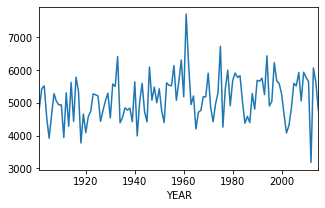

In [29]:
print(data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(5,3)))

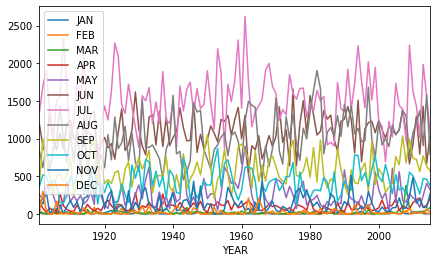

In [30]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(7,4));

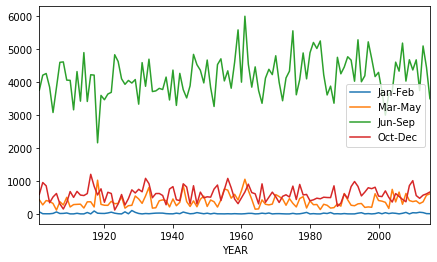

In [31]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(7,4));

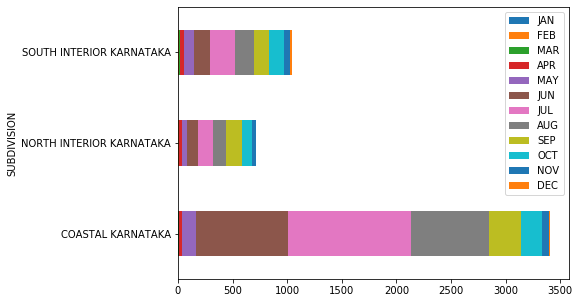

In [32]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(7,5));

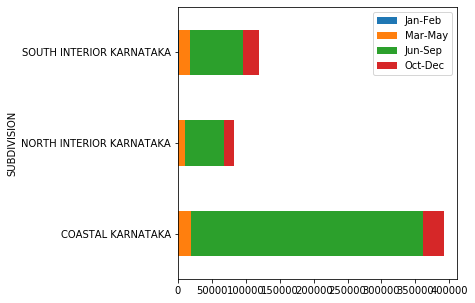

In [33]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(5,5));

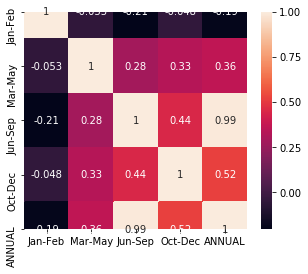

In [34]:
plt.figure(figsize=(5,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

In [35]:
#plt.figure(figsize=(7,2))
#sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
#plt.show()

In [36]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [44]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [38]:
#test 2005
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'COASTAL KARNATAKA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)

In [39]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'COASTAL KARNATAKA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)


In [40]:
#test 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'COASTAL KARNATAKA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [41]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(y_pred)

83.81538461538463
[97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3
 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3
 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3
 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3 97.3]


In [43]:
#2005
y_year_pred_2005 = clf.predict(X_year_2005)

#2010
y_year_pred_2010 = clf.predict(X_year_2010)
    
#2015
y_year_pred_2015 = clf.predict(X_year_2015)
print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

ValueError: X.shape[1] = 3 should be equal to 7, the number of features at training time

In [ ]:
# spliting training and testing data only for KARNATAKA
KARNATAKA = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'NORTH INTERIOR KARNATAKA'])

X = None; y = None
for i in range(KARNATAKA.shape[1]-3):
    if X is None:
        X = KARNATAKA[:, i:i+3]
        y = KARNATAKA[:, i+3]
    else:
        X = np.concatenate((X, KARNATAKA[:, i:i+3]), axis=0)
        y = np.concatenate((y, KARNATAKA[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf',gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(y_pred)
print(mean_absolute_error(y_test, y_pred))

In [ ]:
#2005
y_year_pred_2005 = clf.predict(X_year_2005)

#2010
y_year_pred_2010 = clf.predict(X_year_2010)
    
#2015
y_year_pred_2015 = clf.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
district = pd.read_csv("../data/district_wise_rainfall_normal.csv",sep=",")
district = district.fillna(district.mean())
district.info()

In [ ]:
ap_data = district[district['STATE_UT_NAME'] == 'KARNATAKA']

In [ ]:
ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(7,7));

In [31]:
#ap_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
#       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(7,7));

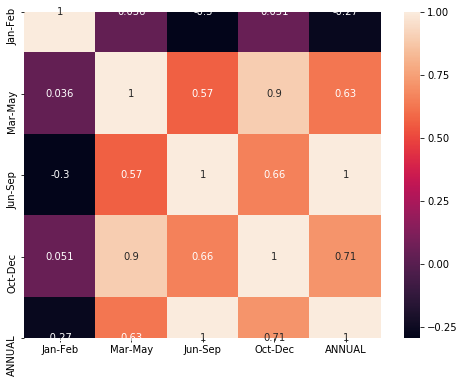

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(ap_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

In [33]:
#plt.figure(figsize=(9,4))
#sns.heatmap(ap_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
#plt.show()

In [34]:
# testing and training for the complete data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [35]:
temp = district[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[district['STATE_UT_NAME'] == 'KARNATAKA']
kar = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'KARNATAKA'])
# print temp
X_year = None; y_year = None
for i in range(kar.shape[1]-3):
    if X_year is None:
        X_year = kar[:, i:i+3]
        y_year = kar[:, i+3]
    else:
        X_year = np.concatenate((X_year, kar[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, kar[:, i+3]), axis=0)

In [41]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(y_pred)

105.39234950377362
[80.10000004 80.         80.10002364 80.09998329 80.09999999 74.35710644
 80.         80.1        80.1        80.09999936 80.10000082 80.1000853
 80.1        79.6184622  80.02439878 80.11908108 80.11496745 79.99073274
 80.1        80.07718602 78.9093165  80.10011277 79.07267472 80.09987691
 80.1        80.1        80.10000017 80.1        80.1        80.09434823
 80.1        80.10000049 80.1        79.70601481 80.1001577  80.1
 80.09278028 80.04768878 80.1        80.12301364 80.88760292 80.07828998
 80.1        80.1        80.1        80.31251913 80.1        80.17583072
 80.1        80.10506909 80.17045479 80.1        80.17492487 80.09999998
 80.2        80.09991766 80.10109512 80.1        80.2        79.62050975
 78.62424648 79.99444998 80.         80.09023703 80.1        80.10002062
 79.3        80.14330353 80.1        80.09971392 80.1        80.1
 80.1        80.099964   80.1        75.08288583 80.1        80.1
 80.09999968 80.09938214 79.02539875 80.1        80.09

MEAN KARNATAKA
91.48888888888888 80.07071592810547
Standard deviation KARNATAKA
69.2514651982091 0.17622864405189773


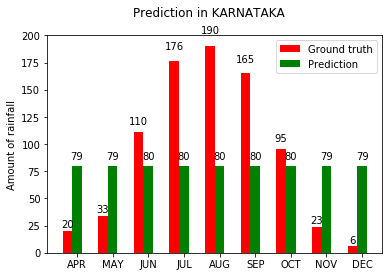

In [42]:
y_year_pred = clf.predict(X_year)
print("MEAN KARNATAKA")
print(np.mean(y_year),np.mean(y_year_pred))
print("Standard deviation KARNATAKA")
print(np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in KARNATAKA")


In [43]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Train on 5035 samples, validate on 560 samples
Epoch 1/10
5035/5035 [==============================] - 1s 146us/step - loss: 5240.4384 - mean_absolute_error: 41.8956 - val_loss: 3477.0640 - val_mean_absolute_error: 36.5835
Epoch 2/10
5035/5035 [==============================] - 1s 151us/step - loss: 5197.7262 - mean_absolute_error: 41.3590 - val_loss: 3453.0026 - val_mean_absolute_error: 35.9083
Epoch 3/10
5035/5035 [==============================] - 1s 152us/step - loss: 5230.3749 - mean_absolute_error: 41.5943 - val_loss: 3195.5162 - val_mean_absolute_error: 35.5440
Epoch 4/10
5035/5035 [==============================] - 1s 150us/step - loss: 5211.6009 - mean_absolute_error: 41.2953 - val_loss: 3236.4893 - val_mean_absolute_error: 35.0028
Epoch 5/10
5035/5035 [==============================] - 1s 139us/step - loss: 5193.2855 - mean_absolute_error: 41.7408 - val_loss: 3568.2014 - val_mean_absolute_error: 36.4799
Epoch 6/10
5035/5035 [==============================] - 1s 146us/step - l